In [ ]:
%pip install torch torchvision torchaudio qiskit pennylane numpy matplotlib

In [4]:
import torch

# Correct path using a raw string
file_path = r'C:\Users\tahir\OneDrive\Desktop\QC\new_seed\processed_eeg_data\sample_0.pt'

# Load the file
data = torch.load(file_path)

# Check the keys in the loaded dictionary
print(data.keys())


dict_keys(['eeg', 'label'])


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\3659042551.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


In [8]:
import torch

# Correct path using a raw string
file_path = r'C:\Users\tahir\OneDrive\Desktop\QC\new_seed\processed_eeg_data\sample_0.pt'

# Load the file
data = torch.load(file_path)

# Accessing the EEG and label data
eeg_data = data['eeg']
labels = data['label']

# Check the type and content
print("Type of EEG data:", type(eeg_data))
print("Shape of EEG data:", eeg_data.shape if isinstance(eeg_data, torch.Tensor) else "Not a Tensor")
print("Type of labels:", type(labels))
print("Content of labels:", labels)


Type of EEG data: <class 'torch.Tensor'>
Shape of EEG data: torch.Size([4, 9, 9])
Type of labels: <class 'int'>
Content of labels: 2


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\4001245854.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


In [45]:
import torch
import os

directory = r'C:\Users\tahir\OneDrive\Desktop\QC\new_seed\processed_eeg_data'
file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.pt')]

all_eeg_data = []
all_labels = []

for file_path in file_paths:
    data = torch.load(file_path)
    all_eeg_data.append(data['eeg'])
    all_labels.append(data['label'])

# Convert list to tensor if necessary
all_eeg_data = torch.stack(all_eeg_data)
all_labels = torch.tensor(all_labels)

print(all_eeg_data.shape)
print(all_labels.shape)


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\763456621.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


torch.Size([2745, 4, 9, 9])
torch.Size([2745])


In [46]:
import torch
from torch.utils.data import Dataset, DataLoader

class TensorDataset(Dataset):
    """Dataset wrapping tensors.
    
    Arguments:
        data (Tensor): contains the EEG data points.
        targets (Tensor): contains all of the labels.
    """
    def __init__(self, data, targets):
        assert data.size(0) == targets.size(0)  # Ensure data and targets are matched by first dimension
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

    def __len__(self):
        return self.data.size(0)


In [47]:
import torch
import os
from sklearn.model_selection import train_test_split

def load_data(directory):
    file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.pt')]
    all_eeg_data = []
    all_labels = []

    for file_path in file_paths:
        data = torch.load(file_path)
        all_eeg_data.append(data['eeg'])
        all_labels.append(data['label'])

    all_eeg_data = torch.stack(all_eeg_data)
    all_labels = torch.tensor(all_labels)
    return all_eeg_data, all_labels

# Load data
directory = r'C:\Users\tahir\OneDrive\Desktop\QC\new_seed\processed_eeg_data'
eeg_data, labels = load_data(directory)

# Split data
X_train, X_test, y_train, y_test = train_test_split(eeg_data, labels, test_size=0.2, random_state=42)




C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\2265096829.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


In [49]:
from sklearn.model_selection import train_test_split

# Assuming eeg_data and labels are already loaded and are PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(eeg_data, labels, test_size=0.2, random_state=42)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create Data Loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


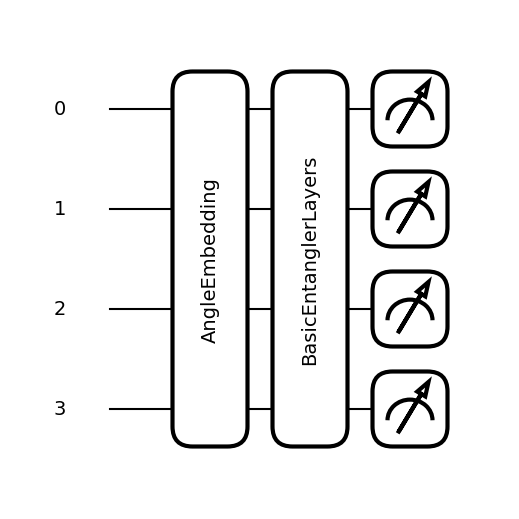

Output from the model: tensor([[-1.1226, -0.9514, -1.2435],
        [-1.1816, -0.8706, -1.2928],
        [-1.0843, -0.9870, -1.2407],
        [-0.9830, -1.0932, -1.2356],
        [-1.1798, -0.8833, -1.2758],
        [-1.2178, -0.8267, -1.3219],
        [-1.0374, -1.1015, -1.1607],
        [-1.0088, -1.1182, -1.1761],
        [-1.1623, -0.9880, -1.1554],
        [-1.1052, -0.9647, -1.2456]], grad_fn=<LogSoftmaxBackward0>)


In [50]:
import pennylane as qml
import torch
from torch import nn, optim
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up a quantum device
num_qubits = 4
dev = qml.device('default.qubit', wires=num_qubits)

# Define a quantum circuit with PyTorch interface
@qml.qnode(dev, interface='torch')
def circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(num_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

class QuantumLayer(nn.Module):
    def __init__(self):
        super(QuantumLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(3, num_qubits))  # 3 layers, num_qubits qubits
        
        # Setup the device and the QNode
        self.dev = qml.device('default.qubit', wires=num_qubits)
        @qml.qnode(self.dev, interface='torch')
        def qnode(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=range(num_qubits))
            qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))
            return [qml.expval(qml.PauliZ(wire)) for wire in range(num_qubits)]
        # Generate random inputs and weights for the drawing
        inputs = np.random.normal(size=(num_qubits,))
        weights = np.random.normal(size=(3, num_qubits))  # 3 layers, num_qubits qubits

        # Draw the circuit using matplotlib
        fig, ax = qml.draw_mpl(qnode, decimals=2)(inputs, weights)
        plt.show()
        self.qnode = qnode

    def forward(self, x):
        # Convert each input to a tensor with proper dtype before applying the quantum node
        quantum_outputs = [torch.tensor(self.qnode(x[i], self.weights)).float() for i in range(x.size(0))]
        # Stack all outputs into a single tensor
        return torch.stack(quantum_outputs)



class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.pre_quantum = nn.Linear(4*9*9, num_qubits)
        self.dropout = nn.Dropout(0.5)  # Add dropout
        self.quantum_layer = QuantumLayer()
        self.post_quantum = nn.Linear(num_qubits, 3)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.pre_quantum(x)
        x = self.dropout(x)  # Apply dropout
        x = self.quantum_layer(x)
        x = self.post_quantum(x)
        return torch.log_softmax(x, dim=1)


# Example to create the model and print its architecture
# Initialize the model
model = HybridModel()

# Dummy input to check the forward pass
dummy_input = torch.randn(10, 4, 9, 9)  # Batch size of 10, each with shape (4, 9, 9)

# Forward pass through the model to check for errors
try:
    output = model(dummy_input)
    print("Output from the model:", output)
except Exception as e:
    print("Error during model forward pass:", e)




In [51]:
import pennylane as qml
import torch
from pennylane import numpy as np

# Set up a quantum device
num_qubits = 4
dev = qml.device('default.qubit', wires=num_qubits)

# Define the quantum circuit
@qml.qnode(dev, interface='torch')
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(num_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# Generate random inputs and weights
inputs = torch.tensor(np.random.normal(size=(num_qubits,)), requires_grad=True)
weights = torch.tensor(np.random.normal(size=(3, num_qubits)), requires_grad=True)  # 3 layers

# Run the circuit
output = quantum_circuit(inputs, weights)

print("Output from the quantum circuit:", output)


Output from the quantum circuit: [tensor(-0.6731, dtype=torch.float64, grad_fn=<DotBackward0>), tensor(0.2530, dtype=torch.float64, grad_fn=<DotBackward0>), tensor(-0.1176, dtype=torch.float64, grad_fn=<DotBackward0>), tensor(-0.2115, dtype=torch.float64, grad_fn=<DotBackward0>)]


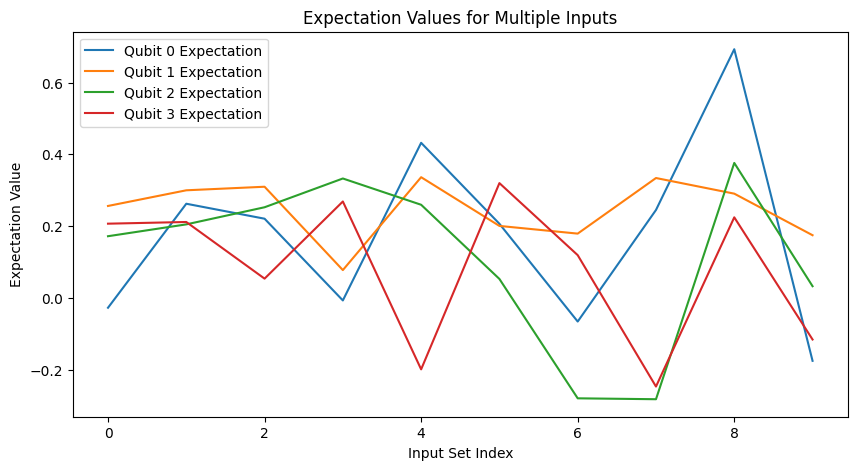

In [52]:
import pennylane as qml
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming the setup of the quantum circuit is correctly done as before

# Generate multiple inputs
inputs_set = torch.tensor(np.random.normal(size=(10, num_qubits)), requires_grad=True)  # 10 different inputs

outputs = []
for inp in inputs_set:
    # Output from the circuit will be a list of tensor values, one for each qubit
    output = quantum_circuit(inp, weights)
    # Convert list of tensors to a single tensor
    output_tensor = torch.stack(output)
    # Detach from the current graph and convert to NumPy
    outputs.append(output_tensor.detach().numpy())

# Convert list of NumPy arrays into a single NumPy array for plotting
outputs = np.array(outputs)

# Plot the outputs
plt.figure(figsize=(10, 5))
for i in range(num_qubits):
    plt.plot(outputs[:, i], label=f'Qubit {i} Expectation')
plt.title('Expectation Values for Multiple Inputs')
plt.xlabel('Input Set Index')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()


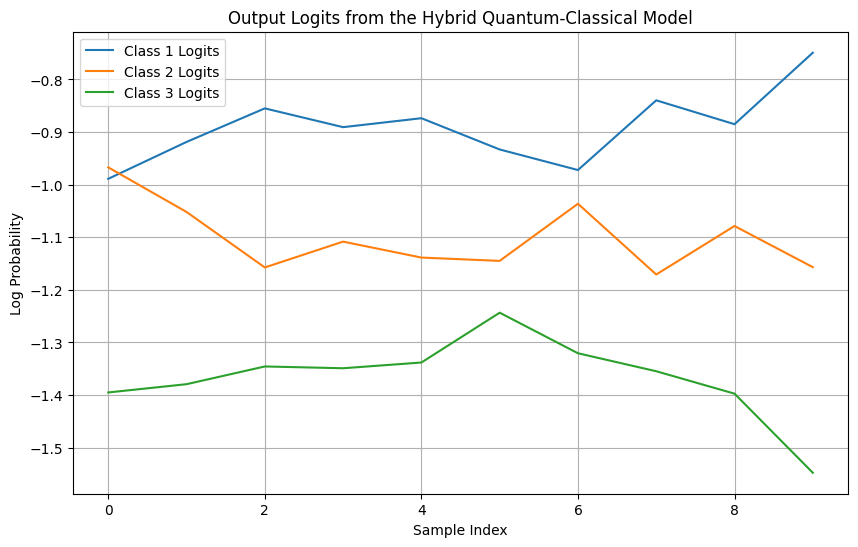

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the output tensor from the model as mentioned
outputs = np.array([[-0.9889, -0.9671, -1.3950],
                    [-0.9188, -1.0519, -1.3793],
                    [-0.8550, -1.1574, -1.3456],
                    [-0.8907, -1.1083, -1.3490],
                    [-0.8737, -1.1386, -1.3381],
                    [-0.9331, -1.1449, -1.2434],
                    [-0.9722, -1.0363, -1.3205],
                    [-0.8397, -1.1708, -1.3547],
                    [-0.8851, -1.0786, -1.3973],
                    [-0.7492, -1.1568, -1.5476]])

# Plotting
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming three output classes
    plt.plot(outputs[:, i], label=f'Class {i+1} Logits')
plt.xlabel('Sample Index')
plt.ylabel('Log Probability')
plt.title('Output Logits from the Hybrid Quantum-Classical Model')
plt.legend()
plt.grid(True)
plt.show()


[Input (4, 9, 9)] 
     ↓
[Pre-Quantum Linear (to 4 qubits)] 
     ↓
[Dropout (0.5)]
     ↓
[Quantum Layer (4 qubits, 3 layers)] 
     ↓
[Post-Quantum Linear (to 3 classes)]
     ↓
[Log Softmax]
     ↓
[Output (Log probabilities of 3 classes)]


In [ ]:
import torch

# Check if CUDA is available
print(torch.cuda.is_available())

# Display CUDA version and the current GPU device
if torch.cuda.is_available():
    print(torch.version.cuda)
    print(torch.cuda.get_device_name(torch.cuda.current_device()))


In [ ]:
#CUDA 12.4

%pip install --verbose torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu124



In [24]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 1

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for idx in range(0, X_train.size(0), 32):  # Batch size of 32
        batch_X, batch_y = X_train[idx:idx+32], y_train[idx:idx+32]
        optimizer.zero_grad()
        output = model(batch_X.float())
        loss = loss_func(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / (idx+1)}")


Epoch 1, Loss: 0.03487519841156917


In [27]:
import torch
from torch import optim, nn
import numpy as np

# Assuming model, train_loader, and test_loader are already defined
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50, device='cuda'):
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for data, target in train_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation phase
        val_loss = validate_model(model, test_loader, criterion, device)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}')

        # Early stopping and saving the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print("Saved Best Model")

def validate_model(model, test_loader, criterion, device='cuda'):
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss = criterion(output, target)
            total_val_loss += val_loss.item()
    return total_val_loss / len(test_loader)

# Set up the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50)


Epoch 1, Train Loss: 1.0911, Validation Loss: 1.0784
Saved Best Model
Epoch 2, Train Loss: 1.0906, Validation Loss: 1.0780
Saved Best Model
Epoch 3, Train Loss: 1.0900, Validation Loss: 1.0773
Saved Best Model
Epoch 4, Train Loss: 1.0900, Validation Loss: 1.0769
Saved Best Model
Epoch 5, Train Loss: 1.0896, Validation Loss: 1.0760
Saved Best Model
Epoch 6, Train Loss: 1.0895, Validation Loss: 1.0760
Saved Best Model
Epoch 7, Train Loss: 1.0893, Validation Loss: 1.0758
Saved Best Model
Epoch 8, Train Loss: 1.0887, Validation Loss: 1.0755
Saved Best Model
Epoch 9, Train Loss: 1.0887, Validation Loss: 1.0751
Saved Best Model
Epoch 10, Train Loss: 1.0884, Validation Loss: 1.0748
Saved Best Model
Epoch 11, Train Loss: 1.0883, Validation Loss: 1.0745
Saved Best Model
Epoch 12, Train Loss: 1.0879, Validation Loss: 1.0743
Saved Best Model
Epoch 13, Train Loss: 1.0879, Validation Loss: 1.0737
Saved Best Model
Epoch 14, Train Loss: 1.0873, Validation Loss: 1.0734
Saved Best Model
Epoch 15, Train

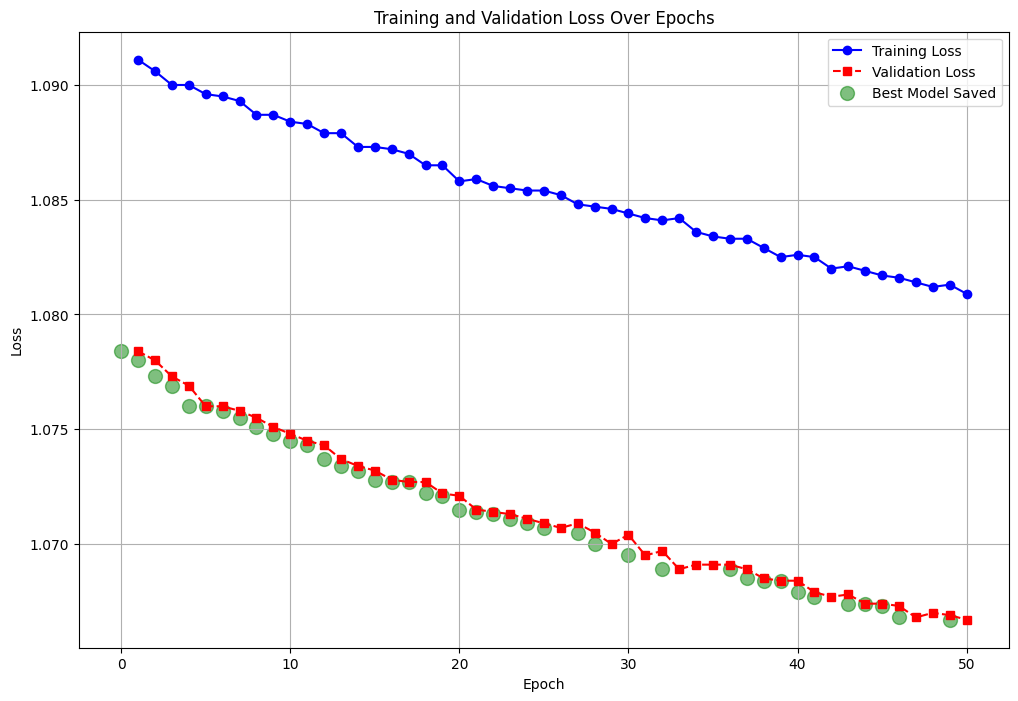

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the training output
epochs = np.arange(1, 51)
train_losses = np.array([
    1.0911, 1.0906, 1.0900, 1.0900, 1.0896, 1.0895, 1.0893, 1.0887, 1.0887, 1.0884,
    1.0883, 1.0879, 1.0879, 1.0873, 1.0873, 1.0872, 1.0870, 1.0865, 1.0865, 1.0858,
    1.0859, 1.0856, 1.0855, 1.0854, 1.0854, 1.0852, 1.0848, 1.0847, 1.0846, 1.0844,
    1.0842, 1.0841, 1.0842, 1.0836, 1.0834, 1.0833, 1.0833, 1.0829, 1.0825, 1.0826,
    1.0825, 1.0820, 1.0821, 1.0819, 1.0817, 1.0816, 1.0814, 1.0812, 1.0813, 1.0809
])
validation_losses = np.array([
    1.0784, 1.0780, 1.0773, 1.0769, 1.0760, 1.0760, 1.0758, 1.0755, 1.0751, 1.0748,
    1.0745, 1.0743, 1.0737, 1.0734, 1.0732, 1.0728, 1.0727, 1.0727, 1.0722, 1.0721,
    1.0715, 1.0714, 1.0713, 1.0711, 1.0709, 1.0707, 1.0709, 1.0705, 1.0700, 1.0704,
    1.0695, 1.0697, 1.0689, 1.0691, 1.0691, 1.0691, 1.0689, 1.0685, 1.0684, 1.0684,
    1.0679, 1.0677, 1.0678, 1.0674, 1.0674, 1.0673, 1.0668, 1.0670, 1.0669, 1.0667
])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(epochs, validation_losses, marker='s', linestyle='--', color='red', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Highlighting epochs where the best model was saved
best_epochs = [i for i, val in enumerate(validation_losses) if val == min(validation_losses[:i+1])]
plt.scatter(best_epochs, validation_losses[best_epochs], color='green', s=100, label='Best Model Saved', alpha=0.5)

plt.legend()
plt.show()


In [28]:
def evaluate_model(model, test_loader, device='cuda'):
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

# Evaluate the model
evaluate_model(model, test_loader)


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\2955481243.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Accuracy of the network on the test images: 45.90%


In [30]:
import torch

# Check if CUDA (GPU support) is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device: {device}")


Training on device: cpu


In [31]:
import torch
from torch import optim, nn
import numpy as np

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Assuming model, train_loader, and test_loader are already defined
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50, device='cuda'):
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for data, target in train_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
        scheduler.step()
        # Validation phase
        val_loss = validate_model(model, test_loader, criterion, device)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}')

        # Early stopping and saving the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_01.pth')
            print("Saved Best Model")

def validate_model(model, test_loader, criterion, device='cuda'):
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss = criterion(output, target)
            total_val_loss += val_loss.item()
    return total_val_loss / len(test_loader)

# Set up the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50)


c:\Users\tahir\OneDrive\Desktop\QC\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 1, Train Loss: 1.1395, Validation Loss: 1.1340
Saved Best Model
Epoch 2, Train Loss: 1.1264, Validation Loss: 1.1210
Saved Best Model
Epoch 3, Train Loss: 1.1166, Validation Loss: 1.1113
Saved Best Model
Epoch 4, Train Loss: 1.1079, Validation Loss: 1.1035
Saved Best Model
Epoch 5, Train Loss: 1.1029, Validation Loss: 1.0981
Saved Best Model
Epoch 6, Train Loss: 1.1000, Validation Loss: 1.0935
Saved Best Model
Epoch 7, Train Loss: 1.0968, Validation Loss: 1.0906
Saved Best Model
Epoch 8, Train Loss: 1.0947, Validation Loss: 1.0887
Saved Best Model
Epoch 9, Train Loss: 1.0929, Validation Loss: 1.0874
Saved Best Model
Epoch 10, Train Loss: 1.0911, Validation Loss: 1.0865
Saved Best Model
Epoch 11, Train Loss: 1.0907, Validation Loss: 1.0860
Saved Best Model
Epoch 12, Train Loss: 1.0914, Validation Loss: 1.0846
Saved Best Model
Epoch 13, Train Loss: 1.0891, Validation Loss: 1.0836
Saved Best Model
Epoch 14, Train Loss: 1.0895, Validation Loss: 1.0829
Saved Best Model
Epoch 15, Train

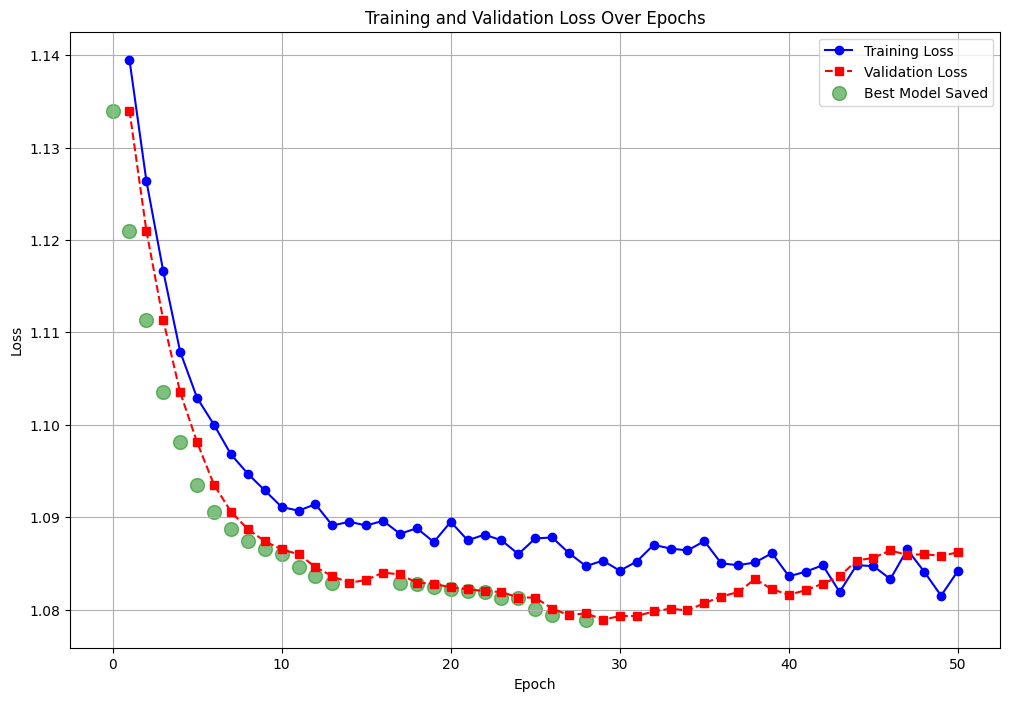

In [40]:
# Updated data for training output
train_losses = np.array([
    1.1395, 1.1264, 1.1166, 1.1079, 1.1029, 1.1000, 1.0968, 1.0947, 1.0929, 1.0911,
    1.0907, 1.0914, 1.0891, 1.0895, 1.0891, 1.0896, 1.0882, 1.0888, 1.0873, 1.0895,
    1.0875, 1.0881, 1.0875, 1.0860, 1.0877, 1.0878, 1.0861, 1.0847, 1.0853, 1.0842,
    1.0852, 1.0870, 1.0866, 1.0864, 1.0874, 1.0850, 1.0848, 1.0851, 1.0861, 1.0836,
    1.0841, 1.0848, 1.0819, 1.0848, 1.0847, 1.0833, 1.0865, 1.0841, 1.0815, 1.0842
])
validation_losses = np.array([
    1.1340, 1.1210, 1.1113, 1.1035, 1.0981, 1.0935, 1.0906, 1.0887, 1.0874, 1.0865,
    1.0860, 1.0846, 1.0836, 1.0829, 1.0832, 1.0840, 1.0838, 1.0829, 1.0828, 1.0824,
    1.0822, 1.0820, 1.0819, 1.0813, 1.0813, 1.0801, 1.0794, 1.0796, 1.0789, 1.0793,
    1.0793, 1.0798, 1.0801, 1.0799, 1.0807, 1.0814, 1.0819, 1.0833, 1.0822, 1.0816,
    1.0821, 1.0828, 1.0836, 1.0853, 1.0856, 1.0864, 1.0859, 1.0860, 1.0858, 1.0862
])

# Plotting again
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.plot(epochs, validation_losses, marker='s', linestyle='--', color='red', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Highlighting epochs where the best model was saved
best_epochs = [i for i, val in enumerate(validation_losses) if val == min(validation_losses[:i+1])]
plt.scatter(best_epochs, validation_losses[best_epochs], color='green', s=100, label='Best Model Saved', alpha=0.5)

plt.legend()
plt.show()


In [32]:
def evaluate_model(model, test_loader, device='cuda'):
    model.load_state_dict(torch.load('best_model_01.pth'))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

# Evaluate the model
evaluate_model(model, test_loader)


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\2281394757.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_01.pth'))


Accuracy of the network on the test images: 41.71%


In [57]:
import torch
from torch import optim, nn
import numpy as np

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=150, device='cuda', early_stopping_tolerance=1e-4, patience=10):
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for data, target in train_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)  # Collect training loss for visualization

        # Validation phase
        val_loss = validate_model(model, test_loader, criterion, device)
        val_losses.append(val_loss)  # Collect validation loss for visualization

        print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}')

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_04.pth')
            print("Saved Best Model")
        #     epochs_no_improve = 0  # Reset counter if improvement
        # else:
        #     epochs_no_improve += 1
        #     if epochs_no_improve >= patience:
        #         print("Early stopping triggered due to no improvement in validation loss.")
        #         break

        # # Early stopping based on negligible change
        # if epochs_no_improve > 0 and abs(val_loss - best_val_loss) < early_stopping_tolerance:
        #     print("Early stopping triggered due to negligible loss improvement.")
        #     break

    return train_losses, val_losses  # Return losses for potential further analysis

def validate_model(model, test_loader, criterion, device='cuda'):
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss = criterion(output, target)
            total_val_loss += val_loss.item()
    return total_val_loss / len(test_loader)

# Set up the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model and save losses for visualization
train_losses, val_losses = train_model(model, train_loader, test_loader, criterion, optimizer)


Epoch 1, Train Loss: 1.0705, Validation Loss: 1.1943
Saved Best Model
Epoch 2, Train Loss: 1.0754, Validation Loss: 1.1907
Saved Best Model
Epoch 3, Train Loss: 1.0696, Validation Loss: 1.1934
Epoch 4, Train Loss: 1.0685, Validation Loss: 1.1904
Saved Best Model
Epoch 5, Train Loss: 1.0689, Validation Loss: 1.1912
Epoch 6, Train Loss: 1.0732, Validation Loss: 1.1926
Epoch 7, Train Loss: 1.0739, Validation Loss: 1.1944
Epoch 8, Train Loss: 1.0691, Validation Loss: 1.1934
Epoch 9, Train Loss: 1.0704, Validation Loss: 1.1909
Epoch 10, Train Loss: 1.0722, Validation Loss: 1.1895
Saved Best Model
Epoch 11, Train Loss: 1.0716, Validation Loss: 1.1913
Epoch 12, Train Loss: 1.0695, Validation Loss: 1.1891
Saved Best Model
Epoch 13, Train Loss: 1.0727, Validation Loss: 1.1879
Saved Best Model
Epoch 14, Train Loss: 1.0729, Validation Loss: 1.1915
Epoch 15, Train Loss: 1.0698, Validation Loss: 1.1942
Epoch 16, Train Loss: 1.0646, Validation Loss: 1.1961
Epoch 17, Train Loss: 1.0677, Validation Lo

In [60]:
def evaluate_model(model, train_loader, device='cuda'):
    model.load_state_dict(torch.load('best_model_04.pth'))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in train_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    #print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

# Evaluate the model
evaluate_model(model, train_loader)

def test_model_on_training_data(model, train_loader, device='cuda'):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disabling gradient calculation
        for data, target in train_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the training data: {accuracy:.2f}%')

# Assuming 'model' and 'train_loader' are already defined
test_model_on_training_data(model, train_loader)


C:\Users\tahir\AppData\Local\Temp\ipykernel_13308\2606674995.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_04.pth'))


Accuracy on the training data: 33.42%


In [62]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
for epoch in range(20):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    scheduler.step()  # Decay the learning rate
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.0786601305007935
Epoch 2, Loss: 1.0216953754425049
Epoch 3, Loss: 1.1365840435028076
Epoch 4, Loss: 1.1243603229522705
Epoch 5, Loss: 1.1138170957565308
Epoch 6, Loss: 1.087738037109375
Epoch 7, Loss: 1.1336171627044678
Epoch 8, Loss: 1.0363671779632568
Epoch 9, Loss: 1.0624644756317139
Epoch 10, Loss: 0.9868291020393372
Epoch 11, Loss: 1.0303850173950195
Epoch 12, Loss: 1.064444661140442
Epoch 13, Loss: 1.1546223163604736
Epoch 14, Loss: 1.0342800617218018
Epoch 15, Loss: 1.1126410961151123
Epoch 16, Loss: 1.1210975646972656
Epoch 17, Loss: 1.0757615566253662
Epoch 18, Loss: 1.1770981550216675
Epoch 19, Loss: 1.12302827835083
Epoch 20, Loss: 1.0236985683441162
